## initiation and preparation
___

In [1]:
%matplotlib widget

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc, erfcinv
from scipy.optimize import minimize

from mpl_toolkits.mplot3d import Axes3D
from cell_library import loadparams

In [93]:
# TC = np.load('data\\ExpTF_exc_Nstp40_new.npy').T
# RE = np.load('data\\ExpTF_inh_Nstp40_new.npy').T
# FS = np.load('./data/ExpTF_cortex_tau_e_4_inh_Nstp20.npy').T
# RS= np.load('./data/ExpTF_cortex_tau_e_4_exc_Nstp20.npy').T

FS=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_inh_Nstp60_tau_e_4_b_30_vol2.npy').T
RS=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_exc_Nstp60_tau_e_4_b_30_vol2.npy').T

FS2=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_inh_Nstp60_tau_e_4_b_30_vol3.npy').T
RS2=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_exc_Nstp60_tau_e_4_b_30_vol3.npy').T

ve = np.linspace(0, 40, 60)
vi = np.linspace(0, 40, 60)

vve, vvi = np.meshgrid(ve, vi)

In [97]:
ve = np.linspace(0, 40, 60)
ve2 = np.linspace(0.1,10, 30)
ve3 = sorted(np.concatenate([ve,ve2]))

ve=ve3
vve, vvi = np.meshgrid(ve, vi)
#take indices
indix = []
for i in ve2:
    idx = np.where(ve3==i)
    indix.append(idx[0][0])
    

In [95]:
# for FS
nan_ar = np.empty((46,30))
nan_ar[:] = np.nan
print(nan_ar.shape)
FS2_ = np.vstack([FS2, nan_ar])
 
print(indix)
FS_bet = FS
for i in range(len(indix)):
    FSfin = np.insert(FS_bet, indix[i], FS2_[:,i], axis=1)
    FS_bet = FSfin
#     print(np.shape(FS_bet))

(46, 30)
[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44]


In [5]:
# for RS
nan_ar = np.empty((46,30))
nan_ar[:] = np.nan
print(nan_ar.shape)
RS2_ = np.vstack([RS2, nan_ar])
print(RS2_.shape)
    
RS_bet = RS
for i in range(len(indix)):
    RSfin = np.insert(RS_bet, indix[i], RS2_[:,i], axis=1)
    RS_bet = RSfin
#     print(np.shape(RS_bet))

(46, 30)
(60, 30)
[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44]
(60, 61)
(60, 62)
(60, 63)
(60, 64)
(60, 65)
(60, 66)
(60, 67)
(60, 68)
(60, 69)
(60, 70)
(60, 71)
(60, 72)
(60, 73)
(60, 74)
(60, 75)
(60, 76)
(60, 77)
(60, 78)
(60, 79)
(60, 80)
(60, 81)
(60, 82)
(60, 83)
(60, 84)
(60, 85)
(60, 86)
(60, 87)
(60, 88)
(60, 89)
(60, 90)


In [99]:
RS = RS_bet
FS = FS_bet

(0.0, 10.0)

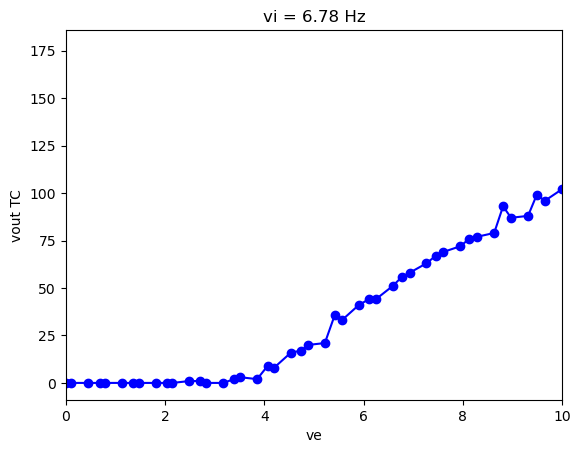

In [100]:
i = 10 # choose inhibitory input
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ve, FS[i], '-ob')
ax.set_title(f'vi = {vi[i]:.2f} Hz')
ax.set_xlabel('ve')
ax.set_ylabel('vout TC')
plt.xlim(0,10)

Text(0, 0.5, 'vout TC')

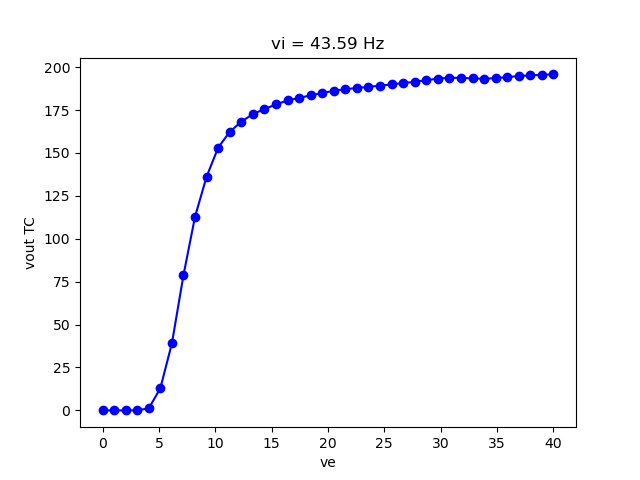

In [301]:
i = 10 # choose inhibitory input
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ve, FS[i], '-ob')
ax.set_title(f'vi = {vi[i]:.2f} Hz')
ax.set_xlabel('ve')
ax.set_ylabel('vout TC')

# # plt.plot(ve, TC[i], '-ob')
# plt.plot(ve, FS[i], '-ob')
# plt.title(f'vi = {vi[i]:.2f} Hz')
# plt.xlabel('ve')
# plt.ylabel('vout TC')

In [155]:
rex1 = np.linspace(0, 16, 40)
rex2 = np.linspace(16, 60, 20)
rex3=np.concatenate([rex1,rex2])
rex3.shape

(60,)

In [13]:
vve, vvi = np.meshgrid(ve, vi)

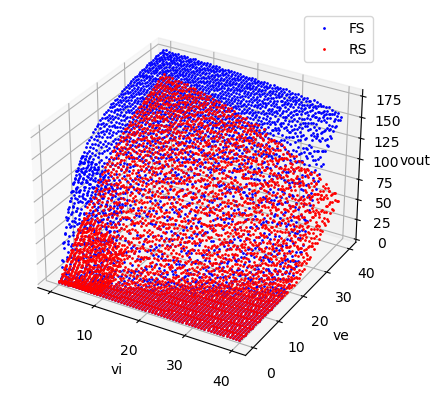

In [15]:
# Create a new figure
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1, label='FS')
ax.plot3D(vvi.flatten(), vve.flatten(), RS.flatten(), 'or', markersize=1, label='RS')

# Set labels for the axes
ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')

# Add a legend
ax.legend()

# Display the plot
plt.show()

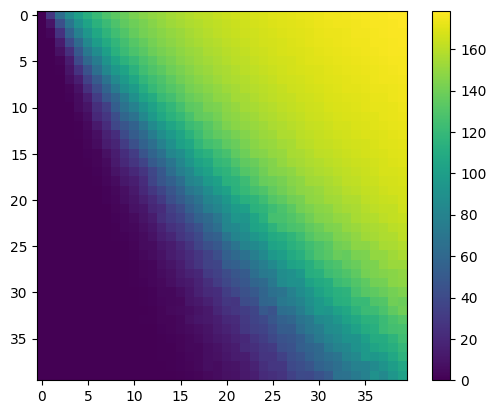

In [101]:
plt.imshow(TC)
plt.colorbar()

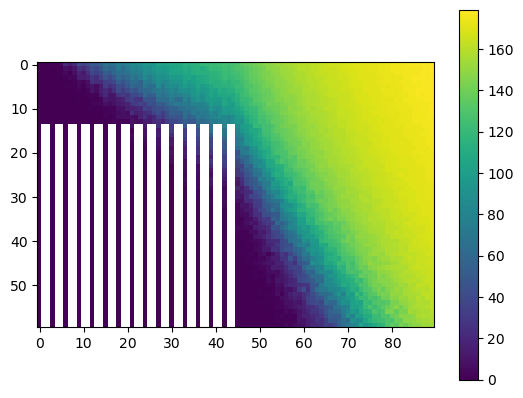

In [101]:

# Create a new figure
fig = plt.figure()

# Create axes for the plot
ax1 = fig.add_subplot(111)

# Plot the image and store the returned mappable object
image = ax1.imshow(FS)

# Add a colorbar using the mappable object
plt.colorbar(image)

# Display the plot
plt.show()

In [102]:
# params = loadparams('thalamus_ACh')
params = loadparams('cortex_updown_maria_no_adapt')

In [103]:
params['FS']

{'P': array([-0.05184978,  0.0061593 , -0.01403522,  0.00166511, -0.0020559 ,
         0.00656668,  0.00171829,  0.00318432, -0.04516385, -0.03112775]),
 'Nexc': 400,
 'Ninh': 100,
 'Qe': 1.5e-09,
 'Qi': 5e-09,
 'Cm': 2e-10,
 'El': -0.065,
 'Gl': 1e-08,
 'Tw': 0.5,
 'a': 0,
 'b': 0.0,
 'Ti': 0.005,
 'Te': 0.004,
 'Ee': 0,
 'Ei': -0.08}

In [18]:
params['RS']

{'P': array([-0.05017034,  0.00451531, -0.00794377, -0.00208418, -0.00054697,
         0.00194753,  0.00274079,  0.00341614, -0.01066769, -0.01156433]),
 'Nexc': 400,
 'Ninh': 100,
 'Qe': 1.5e-09,
 'Qi': 5e-09,
 'Cm': 2e-10,
 'El': -0.064,
 'Gl': 1e-08,
 'Tw': 0.5,
 'a': 0.0,
 'b': 0.0,
 'Ti': 0.005,
 'Te': 0.004,
 'Ee': 0,
 'Ei': -0.08}

In [31]:
params['TC']

{'P': array([-0.0473077 ,  0.00168071,  0.00097111, -0.00346337,  0.000475  ,
        -0.00167624, -0.00645524,  0.00343409, -0.00114066,  0.00018571]),
 'Nexc': 800,
 'Ninh': 25,
 'Qe': 1e-09,
 'Qi': 6e-09,
 'Cm': 1.6e-10,
 'El': -0.065,
 'Gl': 1e-08,
 'Tw': 0.2,
 'a': 0,
 'b': 1e-11,
 'Ti': 0.005,
 'Te': 0.005,
 'Ee': 0,
 'Ei': -0.08}

## theory and functions
___

$ \mu_{Ge}(\nu_e,\nu_i)=\nu_eK_e\tau_eQ_e $

$ \mu_{Gi}(\nu_e,\nu_i)=\nu_iK_i\tau_iQ_i $

$ \mu_G(\nu_e,\nu_i)=\mu_{Ge}+\mu_{Gi}+g_L $

$ \tau_m^\text{eff}(\nu_e,\nu_i)=\frac{C_m}{\mu_G} $

$ \mu_V=\frac{\mu_{Ge}E_e+\mu_{Gi}E_i+g_LE_L-w}{\mu_G} $

$ \mu_V=\frac{\mu_{Ge}E_e+\mu_{Gi}E_i+g_LE_L-\nu_\text{out}\tau_wb+aE_L}{\mu_G+a} $

$ \sigma_V(\nu_e,\nu_i)=\sqrt{\sum_sK_s\nu_s\frac{(U_s\cdot\tau_s)^2}{2(\tau_m^\text{eff}+\tau_s)}} $

$ \tau_V(\nu_e,\nu_i)=\left(\frac{\sum_sK_s\nu_s(U_s\cdot\tau_s)^2}{\sum_sK_s\nu_s(U_s\cdot\tau_s)^2/(\tau_m^\text{eff}+\tau_s)}\right) $

$ U_s=\frac{Q_s}{\mu_G}(E_s-\mu_V) $

$ \nu_\text{out}=\frac{1}{2\tau_V}\cdot\text{Erfc}\left(\frac{V_\text{thr}^\text{eff}-\mu_V}{\sqrt{2}\sigma_V}\right) $

$ V_\text{thr}^\text{eff}(\mu_V,\sigma_V,\tau_V^N)=P_0+\sum_{x\in\{\mu_V,\sigma_V,\tau_V^N\}}P_x\cdot\left(\frac{x-x^0}{\delta x^0}\right)+\sum_{x,y\in\{\mu_V,\sigma_V,\tau_V^N\}^2}P_{xy}\cdot\left(\frac{x-x^0}{\delta x^0}\right)\left(\frac{y-y^0}{\delta y^0}\right) $

$ \text{MPF}:(\nu_e,\nu_i)\longrightarrow(\mu_V,\sigma_V,\tau_V,\tau_V^N) $

In [104]:
def MPF(typ,fexc,finh,fout):

    p = params[ typ ]
    P,Nexc,Ninh,Qe,Qi,Cm,El = p.P,p.Nexc,p.Ninh,p.Qe,p.Qi,p.Cm,p.El
    a,b,Tw,Gl,Te,Ti,Ee,Ei = p.a,p.b,p.Tw,p.Gl,p.Te,p.Ti,p.Ee,p.Ei

    fexc[fexc<1e-9]=1e-9
    fe = fexc*Nexc
    finh[finh<1e-9]=1e-9
    fi = finh*Ninh


    muGi = Qi*Ti*fi
    muGe = Qe*Te*fe
    muG = Gl+muGe+muGi
    muV = (muGe*Ee+muGi*Ei+Gl*El - fout*Tw*b + a*El)/(muG+a)
    
    
    muGn = muG/Gl
    Tm = Cm/muG
    
    Ue =  Qe/muG*(Ee-muV)
    Ui = Qi/muG*(Ei-muV)

    sV = np.sqrt(fe*(Ue*Te)*(Ue*Te)/2./(Te+Tm)+fi*(Ui*Ti)*(Ui*Ti)/2./(Ti+Tm))

    Tv = ( fe*(Ue*Te)*(Ue*Te) + fi*(Qi*Ui)*(Qi*Ui)) /( fe*(Ue*Te)*(Ue*Te)/(Te+Tm) + fi*(Qi*Ui)*(Qi*Ui)/(Ti+Tm) )
    TvN = Tv*Gl/Cm

    return muV, sV, Tv, TvN

In [126]:
# test MPF function
typ = 'TC'
xe, xi = 4, 30

m, s, t, _ = MPF(typ, np.array([xe]), np.array([xi]), 0)
print(f'MPF_{typ}: (ve={xe}, vi={xi})Hz -> (mu={m[0]*1e3:.2f}, sigma={s[0]*1e3:.2f}, tau={t[0]*1e3:.2f})mV')

MPF_TC: (ve=4, vi=30)Hz -> (mu=-50.52, sigma=4.50, tau=8.30)mV


In [186]:
# test MPF function
typ = 'FS'
xe, xi = 4, 30

m, s, t, _ = MPF(typ, np.array([xe]), np.array([xi]), 0)
print(f'MPF_{typ}: (ve={xe}, vi={xi})Hz -> (mu={m[0]*1e3:.2f}, sigma={s[0]*1e3:.2f}, tau={t[0]*1e3:.2f})mV')

MPF_FS: (ve=4, vi=30)Hz -> (mu=-68.56, sigma=2.24, tau=7.06)mV


In [109]:
# test MPF function
typ = 'RS'
xe, xi = 4, 30

m, s, t, _ = MPF(typ, np.array([xe]), np.array([xi]), 0)
print(f'MPF_{typ}: (ve={xe}, vi={xi})Hz -> (mu={m[0]*1e3:.2f}, sigma={s[0]*1e3:.2f}, tau={t[0]*1e3:.2f})mV')

MPF_RS: (ve=4, vi=30)Hz -> (mu=-70.19, sigma=2.00, tau=6.11)mV


In [187]:
#====== calculate MPF for TC/RE =======

#-choose here the neuron typ:
typ = 'TC'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

NameError: name 'TC' is not defined

In [105]:
#====== calculate MPF for TC/RE =======

#-choose here the neuron typ:
typ = 'FS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

In [89]:
#====== calculate MPF for TC/RE =======

#-choose here the neuron typ:
typ = 'RS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

Text(0, 0.5, 'muV [mV]')

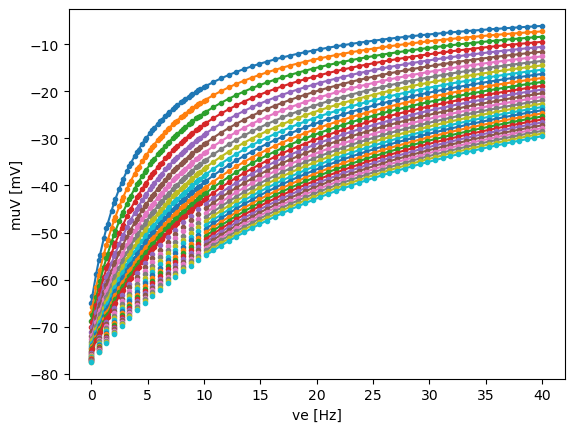

In [106]:
for i in range(30):
    plt.plot(ve, muV[i]*1e3,marker = '.',label=f'vi={vi[i]:.2f}Hz' )

plt.xlabel('ve [Hz]')
plt.ylabel('muV [mV]')
# plt.legend();

muV, sV, Tv, TvN

In [117]:


np.where(np.isnan(TvN))

(array([], dtype=int64), array([], dtype=int64))

In [106]:
muV[0]

array([-0.065     , -0.03983871, -0.02872093, -0.02245455, -0.01843284,
       -0.01563291, -0.01357143, -0.01199029, -0.01073913, -0.00972441,
       -0.00888489, -0.00817881, -0.00757669, -0.00705714, -0.00660428,
       -0.00620603, -0.00585308, -0.00553812, -0.00525532, -0.005     ])

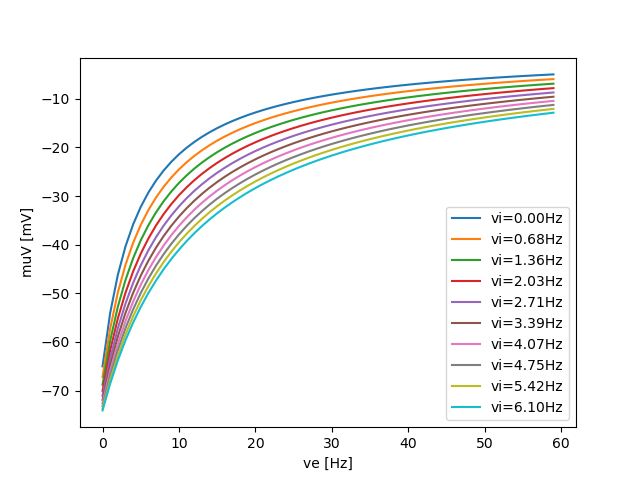

In [190]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(10):
    ax.plot(range(len(muV[i])),muV[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('muV [mV]')
ax.legend();
# plt.show()

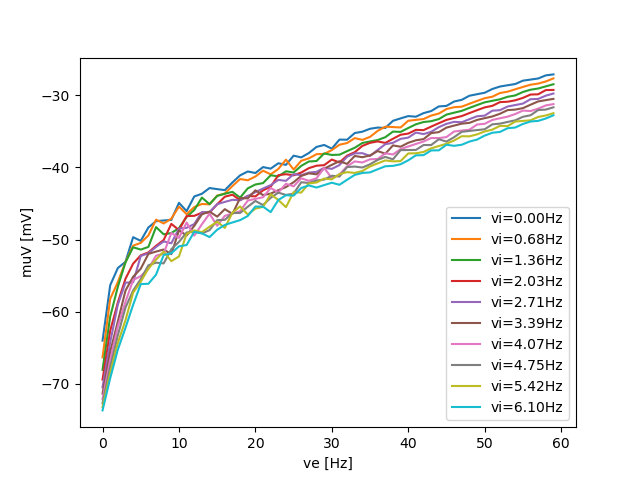

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(10):
    ax.plot(range(len(muV[i])),muV[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('muV [mV]')
ax.legend();
# plt.show()

In [107]:
def pheV(fout, muV, sV, Tv):
    fout[fout<0]=1e-9
    Tv[Tv<0]=1e-9
    return np.sqrt(2)*sV * erfcinv( 2*Tv*fout ) + muV # Zerlaut 2017
    # return np.sqrt(2)*sV * erfcinv( Tv*fout ) + muV # to widen the definition range

In [49]:
#====== calculate phenomenological V_thr^eff ======
Veff = pheV(FF, muV, sV, Tv)

for i in range(len(vi)):
    plt.plot(ve, Veff[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

plt.xlabel('ve [Hz]')
plt.ylabel('Veff [mV]')
# plt.legend(loc=(1.2,-1.2));

Text(31.835199004975134, 0.5, 'Veff [mV]')

Text(0, 0.5, 'Veff [mV]')

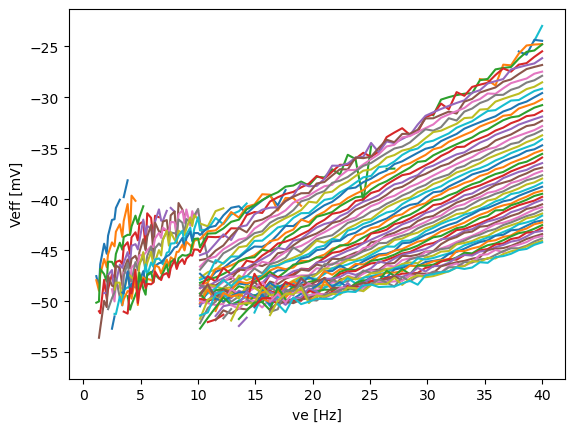

In [108]:
#====== calculate phenomenological V_thr^eff ======
Veff = pheV(FF, muV, sV, Tv)

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(vi)):
    ax.plot(ve, Veff[i]*1e3,label=f'vi={vi[i]:.2f}Hz')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('Veff [mV]')
# plt.legend(loc=(1.2,-1.2));

In [114]:
# remove dimension so that no NaN entries are there anymore
# ONLY important for fitting the Vthr

if typ=='FS': idx = '[15:-20,45:]'
elif typ=='RS': idx = '[:-30,45:]'

exec(f"Veff_fit = Veff{idx}")
exec(f"TC_fit = FS{idx}")
exec(f"RS_fit = RS{idx}")
exec(f"muV_fit = muV{idx}")
exec(f"sV_fit = sV{idx}")
exec(f"Tv_fit = Tv{idx}")
exec(f"TvN_fit = TvN{idx}")
Veff_fit.shape

(25, 45)

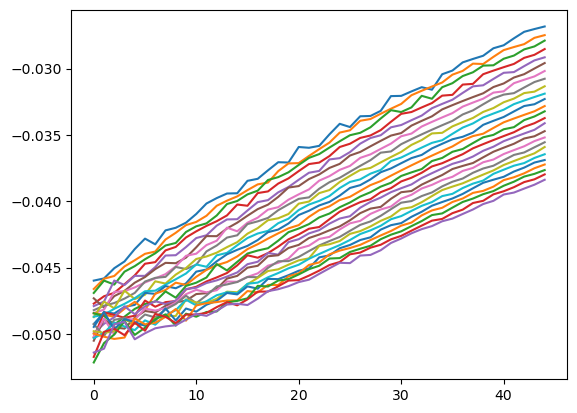

In [115]:
plt.plot(Veff_fit.T);

In [116]:
print(np.where(np.isnan(Veff_fit)))
print(np.where(np.isinf(Veff_fit)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [95]:
jjindex=np.where(np.isinf(Veff))

In [126]:
# Define the nue, nui arrays according to the single neuron simulation (pairs of values used)

Npts=1  #Resolution of the measured TF
Npts2=1
# nue=np.arange(0.0000002,60, Npts)
# nui=np.arange(0.0000002,60, Npts2)
# nue=np.linspace(0.0000002,40, 60)
# nui=np.linspace(0.0000002,40, 60)
#noute=np.arange(0.1,201, Npts)
nue = ve
nui = vi

dim=len(nue)*len(nui)

    
nue2=np.ones(dim)        
#nui2=np.ones(dim)
counter=0        
for i in nue:
    for j in range(0,len(nui)):  
        nue2[counter]=i #value of nue
        
        counter=counter+1
        
nui2=[]        
for j in range(0,len(nue)):
    nui2=np.concatenate((nui2, nui), axis=None)

print(nue2.shape, nui2.shape)

# FS=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_inh_Nstp60_tau_e_4_b_30_vol2.npy').T
# noutexpe=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_exc_Nstp60_tau_e_4_b_30_vol2.npy')
# noutexpe=np.load(f'/DATA/Maria/fede_tau/data/ExpTF_inh_Nstp60_tau_e_4_b_30_vol2.npy')

noutexpe = RS
# adapexpe =np.load(f'/DATA/Maria/fede_tau/data/ExpTF_Adapt_Nstp60_tau_e_4_b_30_vol2.npy')

# Re-write the output of the simulation as an array for the pairs (nue,nui)
noutexpe2=np.ones(dim)
# adapexpe2=np.ones(dim)

counter=0

for j in range(0,len(nue)):
    for i in range(0,len(nui)):
        noutexpe2[counter]=noutexpe[j,i]
        counter=counter+1

(5400,) (5400,)


IndexError: index 60 is out of bounds for axis 0 with size 60

In [78]:
# Remove all the problematic points (nans, etc.) to make the fit
#Keep above 0
jjindex=np.where(noutexpe2>0.)

nue2=nue2[jjindex]#,jjindex)
nui2=nui2[jjindex]
noutexpe2=noutexpe2[jjindex]

# Discard above 
ijn=np.where(nue2>13)

nue2=np.delete(nue2,ijn)
nui2=np.delete(nui2,ijn)
noutexpe2=np.delete(noutexpe2,ijn)

#-choose here the neuron typ:
typ = 'FS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, nue2, nui2, noutexpe2)

Veff = pheV(noutexpe2, muV, sV, Tv)

#svout=sv(nue2,nui2)
#tvout=tauv(nue2,nui2)

#delete Nan
jjindex=np.where(np.isnan(Veff))

nue2=np.delete(nue2,jjindex)
nui2=np.delete(nui2,jjindex)
noutexpe2=np.delete(noutexpe2,jjindex)
print(nue2.shape)

#Delete inf
jjindex=np.where(np.isinf(Veff))

nue2=np.delete(nue2,jjindex)
nui2=np.delete(nui2,jjindex)
noutexpe2=np.delete(noutexpe2,jjindex)
print(nue2.shape)


(432,)
(432,)


In [79]:
#Keep the good ones
muV_fit, sV_fit, Tv_fit, TvN_fit = MPF(typ, nue2, nui2, noutexpe2)

Veff_fit = pheV(noutexpe2, muV_fit, sV_fit, Tv_fit)

In [63]:
Veff_fit.shape

(434,)

In [80]:
len(np.where(np.isinf(Veff_fit))[0])

0

In [81]:
len(np.where(np.isnan(Veff_fit))[0])

0

In [43]:
jjindex=np.where(np.isnan(Veff_fit))

nue2=np.delete(nue2,jjindex)
nui2=np.delete(nui2,jjindex)
noutexpe2=np.delete(noutexpe2,jjindex)
print(nue2.shape)

#Delete inf
jjindex=np.where(np.isinf(Veff_fit))

nue2=np.delete(nue2,jjindex)
nui2=np.delete(nui2,jjindex)
noutexpe2=np.delete(noutexpe2,jjindex)
print(nue2.shape)

(2351,)
(2142,)


In [384]:
np.where(np.isnan(Veff_fit))

(array([], dtype=int64),)

In [321]:
Veff_fit.shape

(2739,)

In [192]:
import pandas as pd
df = pd.DataFrame(Veff)

In [193]:
pd.set_option('display.max_columns', None)

In [228]:
indices = np.argwhere(FS>0)
indices

array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       ...,
       [59, 57],
       [59, 58],
       [59, 59]])

In [226]:
indices = np.argwhere(FS>45)

In [221]:
# Define a function to apply the color to relevant cells
# Define a function to apply the color to relevant cells
def color_cells(val):
    if isinstance(val, tuple):
        row, col = val
        if (row, col) in indices:
            return 'background-color: yellow'
    return ''

In [206]:
FS.shape

(60, 60)

In [223]:
indices

array([[ 0,  1],
       [ 0,  2],
       [ 0,  3],
       ...,
       [59, 57],
       [59, 58],
       [59, 59]])

In [232]:
indices = np.argwhere(FS>40)

In [236]:
def style_specific_cell(x):

    color = 'background-color: red'
    color2 ='background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    for idx in indices:
        
        df1.iloc[idx[0], idx[1]] = color
    df1.iloc[46:60,24:30] = color2
    return df1

df.style.apply(style_specific_cell, axis=None)

In [222]:
# Apply the style to the DataFrame
styled_df = df.style.applymap(color_cells)

# Display the styled DataFrame
styled_df

In [208]:
idx[0].shape

(2875,)

In [194]:
df

0         1         2         3         4         5         6         7   \
0   inf -0.049444 -0.045778 -0.042144 -0.038480       NaN       NaN       NaN   
1   inf       inf -0.045967 -0.043409 -0.041191 -0.040174 -0.039897       NaN   
2   inf       inf -0.046980 -0.044818 -0.043245 -0.041459 -0.039957 -0.038949   
3   inf       inf -0.047915 -0.046585 -0.044350 -0.042895 -0.041890 -0.040568   
4   inf       inf       inf -0.045844 -0.046022 -0.043219 -0.042797 -0.041410   
5   inf       inf -0.050618 -0.047271 -0.045100 -0.045018 -0.043234 -0.042724   
6   inf       inf       inf -0.047698 -0.046604 -0.045270 -0.044728 -0.042884   
7   inf       inf       inf       inf -0.045550 -0.046552 -0.044461 -0.043381   
8   inf       inf       inf -0.049662 -0.045177 -0.046735 -0.043798 -0.044380   
9   inf       inf       inf -0.051025 -0.047767 -0.046899 -0.045018 -0.044875   
10  inf       inf       inf       inf -0.047984 -0.045453 -0.045405 -0.044395   
11  inf       inf       inf       inf       inf -0.046738 -0.045360 -0.046857   
12  inf       inf       inf       inf       inf -0.047934 -0.047266 -0.045165   
13  inf       inf       inf       inf       inf       inf -0.044905 -0.046541   
14  inf       inf       inf       inf       inf -0.049054 -0.047110 -0.047092   
15  inf       inf       inf       inf       inf       inf       inf       inf   
16  inf       inf       inf       inf       inf       inf       inf -0.047691   
17  inf       inf       inf       inf       inf       inf       inf -0.048116   
18  inf       inf       inf       inf       inf -0.052725       inf -0.047326   
19  inf       inf       inf       inf       inf       inf       inf       inf   
20  inf       inf       inf       inf       inf       inf       inf       inf   
21  inf       inf       inf       inf       inf       inf       inf       inf   
22  inf       inf       inf       inf       inf       inf       inf       inf   
23  inf       inf       inf       inf       inf       inf       inf       inf   
24  inf       inf       inf       inf       inf       inf       inf       inf   
25  inf       inf       inf       inf       inf       inf       inf       inf   
26  inf       inf       inf       inf       inf       inf       inf       inf   
27  inf       inf       inf       inf       inf       inf       inf       inf   
28  inf       inf       inf       inf       inf       inf       inf       inf   
29  inf       inf       inf       inf       inf       inf       inf       inf   
30  inf       inf       inf       inf       inf       inf       inf       inf   
31  inf       inf       inf       inf       inf       inf       inf       inf   
32  inf       inf       inf       inf       inf       inf       inf       inf   
33  inf       inf       inf       inf       inf       inf       inf       inf   
34  inf       inf       inf       inf       inf       inf       inf       inf   
35  inf       inf       inf       inf       inf       inf       inf       inf   
36  inf       inf       inf       inf       inf       inf       inf       inf   
37  inf       inf       inf       inf       inf       inf       inf       inf   
38  inf       inf       inf       inf       inf       inf       inf       inf   
39  inf       inf       inf       inf       inf       inf       inf       inf   
40  inf       inf       inf       inf       inf       inf       inf       inf   
41  inf       inf       inf       inf       inf       inf       inf       inf   
42  inf       inf       inf       inf       inf       inf       inf       inf   
43  inf       inf       inf       inf       inf       inf       inf       inf   
44  inf       inf       inf       inf       inf       inf       inf       inf   
45  inf       inf       inf       inf       inf       inf       inf       inf   
46  inf       inf       inf       inf       inf       inf       inf       inf   
47  inf       inf       inf       inf       inf       inf       inf       inf   
48  inf       inf       inf       in

In [212]:
df.to_excel("./thresh.xlsx")

In [128]:
# remove dimension so that no NaN entries are there anymore
# ONLY important for fitting the Vthr

if typ=='TC': idx = '[15:38,8:35]'
elif typ=='RE': idx = '[20:40,10:]'

exec(f"Veff_fit = Veff{idx}")
exec(f"TC_fit = TC{idx}")
exec(f"RE_fit = RE{idx}")
exec(f"muV_fit = muV{idx}")
exec(f"sV_fit = sV{idx}")
exec(f"Tv_fit = Tv{idx}")
exec(f"TvN_fit = TvN{idx}")
Veff_fit.shape

(23, 27)

In [124]:
# remove dimension so that no NaN entries are there anymore
# ONLY important for fitting the Vthr

if typ=='FS': idx = '[12:,6:12]'
elif typ=='RE': idx = '[20:40,10:]'

exec(f"Veff_fit = Veff{idx}")
exec(f"TC_fit = FS{idx}")
exec(f"RE_fit = RS{idx}")
exec(f"muV_fit = muV{idx}")
exec(f"sV_fit = sV{idx}")
exec(f"Tv_fit = Tv{idx}")
exec(f"TvN_fit = TvN{idx}")
Veff_fit.shape

(8, 6)

In [326]:
typ

'FS'

In [327]:
# remove dimension so that no NaN entries are there anymore
# ONLY important for fitting the Vthr

if typ=='FS': idx = '[26:35,11:25]'
elif typ=='RE': idx = '[20:40,10:]'

exec(f"Veff_fit = Veff{idx}")
exec(f"TC_fit = FS{idx}")
exec(f"RE_fit = RS{idx}")
exec(f"muV_fit = muV{idx}")
exec(f"sV_fit = sV{idx}")
exec(f"Tv_fit = Tv{idx}")
exec(f"TvN_fit = TvN{idx}")
Veff_fit.shape

(9, 14)

In [328]:
Veff_fit

array([[-0.0680673 , -0.06784899, -0.06768812, -0.06752392, -0.06742416,
        -0.06726979, -0.06721487, -0.06705109, -0.06698994, -0.06693443,
        -0.06678476, -0.06681178, -0.06676976, -0.06702999],
       [-0.06819817, -0.06794754, -0.06773227, -0.0676995 , -0.06747784,
        -0.06734972, -0.0671828 , -0.06714394, -0.06705127, -0.06683829,
        -0.06692159, -0.06678166, -0.06680758, -0.06687583],
       [-0.06822477, -0.06814441, -0.06793326, -0.06770936, -0.06761249,
        -0.0674784 , -0.06726201, -0.06724097, -0.06715686, -0.06707173,
        -0.06691233, -0.06693795, -0.0669243 , -0.06672037],
       [-0.06829869, -0.06817832, -0.06802803, -0.06781025, -0.06766607,
        -0.06750649, -0.06746111, -0.06726856, -0.0671974 , -0.06707273,
        -0.06704892, -0.06691059, -0.0669645 , -0.06692878],
       [-0.06836411, -0.06833491, -0.06812995, -0.06787067, -0.06779463,
        -0.06763782, -0.06754494, -0.06735956, -0.06729774, -0.06713486,
        -0.06716629, -0.06

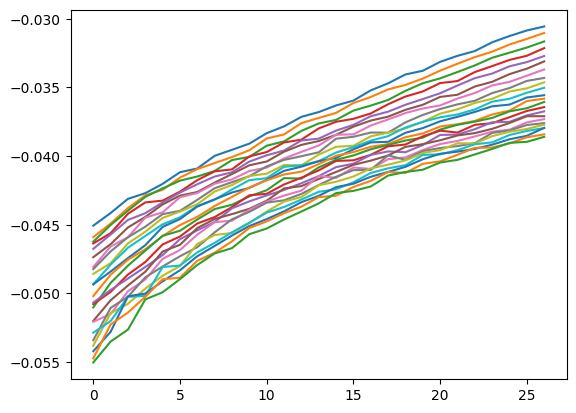

In [129]:
plt.plot(Veff_fit.T);

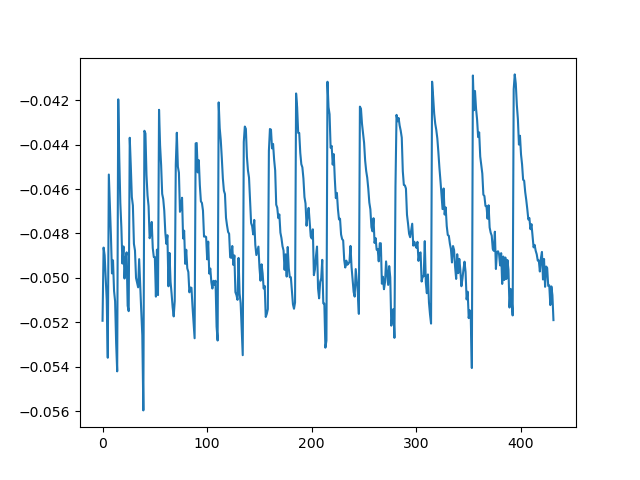

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Veff_fit);
# plt.show()

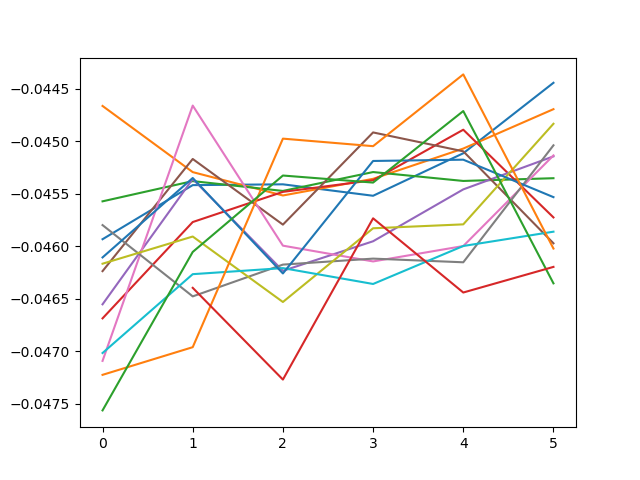

In [238]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Veff_fit.T);
# plt.show()

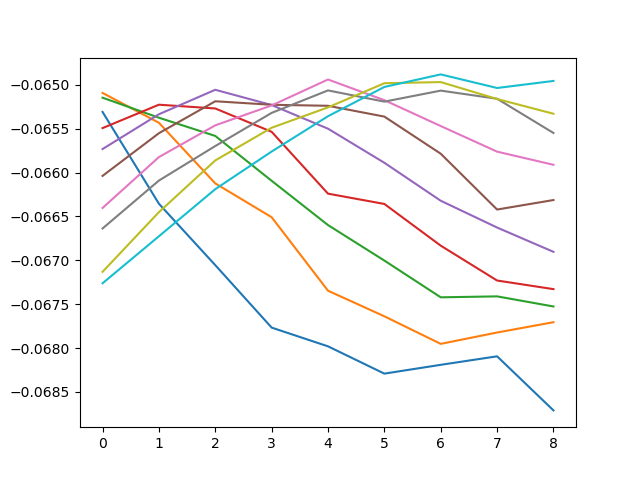

In [203]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Veff_fit.T);
# plt.show()

## fitting and results
___

#### fitting first order to find correct global minimum

In [117]:
# calculating the effective threshold potential with a general second order polynomial of the membrane moments (mu,sigma,tau)

def Vthre(P, muV, sV, TvN):
    # normalizing moments:
    muV0 = -60e-3;
    DmuV0 = 10e-3;
    sV0 = 4e-3;
    DsV0 = 6e-3;
    TvN0 = 0.5;
    DTvN0 = 1.;
    
    # first order polynomial
    Vo1 = P[0] + P[1]*(muV-muV0)/DmuV0 + P[2]*(sV-sV0)/DsV0 + P[3]*(TvN-TvN0)/DTvN0
    # second order polynomial
    Vo2 = P[4]*((muV-muV0)/DmuV0)*((muV-muV0)/DmuV0) + P[5]*(muV-muV0)/DmuV0*(sV-sV0)/DsV0 + P[6]*(muV-muV0)/DmuV0*(TvN-TvN0)/DTvN0 + P[7]*((sV-sV0)/DsV0)*((sV-sV0)/DsV0) + P[8]*(sV-sV0)/DsV0*(TvN-TvN0)/DTvN0  + P[9]*((TvN-TvN0)/DTvN0)*((TvN-TvN0)/DTvN0);

    return Vo1 + Vo2
    

In [118]:
# fitting first order Vthr on the phenomenological threshold space

def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P,[0]*6]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})
# res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='SLSQP', tol=1e-32, options={'disp':True,'maxiter':20000})

P1 = np.array(res.x)
print(P1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 475
         Function evaluations: 891
[-0.04535798  0.00736557 -0.04510991  0.06576456]


p[0] : should be roughly the vthr of the sp.network (eg should not be positive)
the other ps should be small

In [299]:
# fitting first order Vthr on the phenomenological threshold space

def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P,[0]*6]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='nelder-mead', tol=1e-10, options={'disp':True,'maxiter':40000})
# res = minimize(Res, [Veff_fit.mean(),1e-3,1e-3,1e-3], method='SLSQP', options={'xtol': 1e-5, 'disp': True, 'maxiter':10000})

P1 = np.array(res.x)
print(P1)

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 359
         Function evaluations: 608
[-0.04895299  0.00489552 -0.00852738  0.00465014]


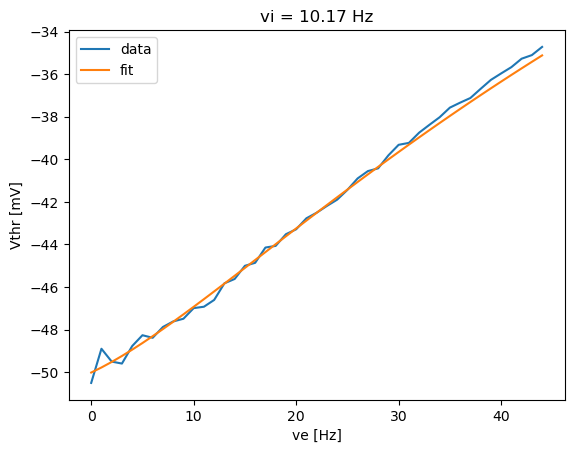

In [131]:
# checking the fit...

# choose vi:
i=15

plt.title(f'vi = {vi[i]:.2f} Hz')

plt.plot(Veff_fit[i]*1e3, label='data')
plt.plot(Vthre(np.concatenate([P1,[0]*6]), muV_fit, sV_fit, TvN_fit)[i]*1e3, label='fit')
plt.xlabel('ve [Hz]')
plt.ylabel('Vthr [mV]')
plt.legend();


In [129]:

Veff_fit.shape

(8, 6)

___
skippable 

In [155]:
# fit the second order parameters on Vthre ( not necessary most of the time!!!! -> SKIP )
def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P1,P]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [1e-9]*6, method='nelder-mead', tol=1e-15, options={'disp':True,'maxiter':20000})
# res = minimize(Res, [0]*6, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':20000})

P2 = np.array(res.x)
print(P2)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1332
         Function evaluations: 2202
[ 2.12321162e-05 -5.51879833e-03  4.75010955e-03 -1.24710725e-02
 -1.17091516e-02  2.03790312e-02]


You do the first fit, and then you do the big fit (only using as initial guesses the P found from the 1st order fit).

If the Veff looks linear, probably you dont need the 2nd order fit.
If it doesnt work, you can also do the fit for the 2nd order and try again.

In [84]:
# fit the second order parameters on Vthre ( not necessary most of the time!!!! -> SKIP )
def Res(P): return np.mean( (Veff_fit - Vthre(np.concatenate([P1,P]), muV_fit, sV_fit, TvN_fit))**2 )

res = minimize(Res, [1e-9]*6, method='SLSQP',options={'ftol': 1e-17, 'disp': True, 'maxiter':400})
# res = minimize(Res, [0]*6, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':20000})

P2 = np.array(res.x)
print(P2)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.1915332268959046e-07
            Iterations: 44
            Function evaluations: 309
            Gradient evaluations: 44
[ 6.93909831e-05 -2.18292347e-03 -1.36581816e-04  5.30791616e-04
  7.32359665e-04 -3.24517175e-03]


In [69]:
P = np.concatenate([P1,P2])

In [85]:
P = np.concatenate([P1,P2])

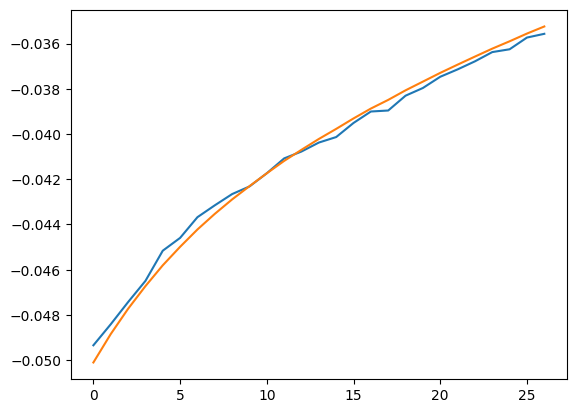

In [158]:
i =10
plt.plot(Veff_fit[i], label='data')
plt.plot(Vthre(P, muV_fit, sV_fit, TvN_fit)[i],label='fit')

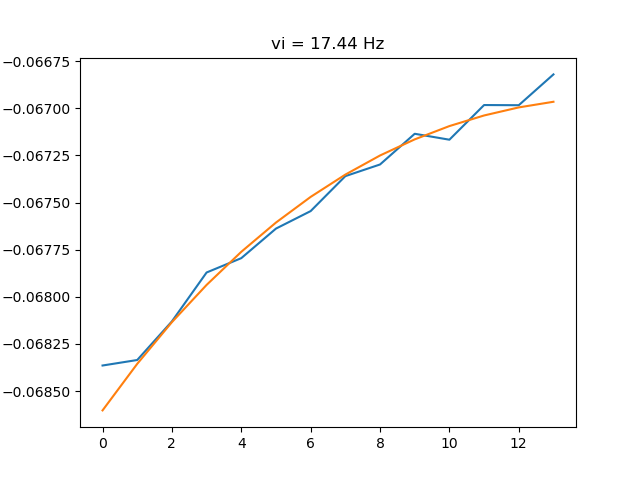

In [335]:
i =4
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111)
ax.set_title(f'vi = {vi[i]:.2f} Hz')

ax.plot(Veff_fit[i])
ax.plot(Vthre(P, muV_fit, sV_fit, TvN_fit)[i])

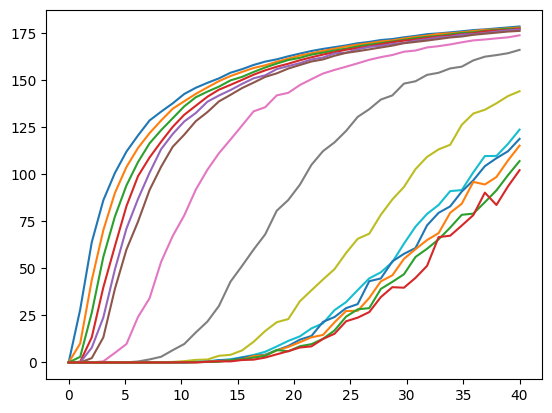

In [163]:
# choose a subspace to fit the firing rate and transfer function ( not necessary BUT produces better results most of the time )
# IMPPORTANT if a subspace in firing rate input is more interesting or badly fitted without doing this ...

red = [0,5,8,9,10,11,12,13,14,15,19,20,21,22,23,24,25,30,39]
# rid = [0,20,30,35,36,37,38,39]
rid = [0,1,2,3,4,5,10,20,30,35,36,37,38,39]
# rid = [0,1,2,3,4,5,6,7,8,9,10]

plt.plot(ve,FF[rid].T);

skippable
___

In [132]:
# the transfer function
def TF(P, muV, sV, Tv, TvN):
    fout = 1/(2*Tv) * erfc( (Vthre(P, muV, sV, TvN) - muV)/(np.sqrt(2)*sV) )
    
    # fout = np.where(fout<0, 1e-9, fout)
    fout[fout<0]=0
    return fout

In [145]:
FF[:14].shape

(14, 90)

In [134]:
def Res(P):
    # return np.mean( (TC_fit - TF(P, muV_fit, sV_fit, Tv_fit, TvN_fit))**2 )
    return np.mean( (FF[:14] - TF(P, muV[:14], sV[:14], Tv[:14], TvN[:14]))**2 )
    # return np.mean( (FF[rid] - TF(P, muV[rid], sV[rid], Tv[rid], TvN[rid]))**2 )

# res = minimize(Res, P, method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})
res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})
# res = minimize(Res, P, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':40000})

PP = np.array(res.x)
print(PP)

[-0.05162447  0.00436991 -0.00115045  0.00068874 -0.00012546 -0.00020845
  0.00024412  0.00013123  0.00031028 -0.00076388]


/tmp/ipykernel_32367/1937771702.py:7: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})


In [28]:
params[typ]

{'P': array([-0.05017034,  0.00451531, -0.00794377, -0.00208418, -0.00054697,
         0.00194753,  0.00274079,  0.00341614, -0.01066769, -0.01156433]),
 'Nexc': 400,
 'Ninh': 100,
 'Qe': 1.5e-09,
 'Qi': 5e-09,
 'Cm': 2e-10,
 'El': -0.064,
 'Gl': 1e-08,
 'Tw': 0.5,
 'a': 0.0,
 'b': 3e-11,
 'Ti': 0.005,
 'Te': 0.004,
 'Ee': 0,
 'Ei': -0.08}

In [26]:
muV, sV, Tv, TvN = MPF(typ, nue2, nui2, noutexpe2)

In [411]:
def Res(P):
    # return np.mean( (TC_fit - TF(P, muV_fit, sV_fit, Tv_fit, TvN_fit))**2 )
    return np.mean( (noutexpe2 - TF(P, muV, sV, Tv, TvN))**2 )
    # return np.mean( (FF[rid] - TF(P, muV[rid], sV[rid], Tv[rid], TvN[rid]))**2 )

# res = minimize(Res, P, method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})
res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-10, options={'disp':True,'maxiter':20000})
# res = minimize(Res, P, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':40000})

PP = np.array(res.x)
print(PP)

Optimization terminated successfully.
         Current function value: 4.264411
         Iterations: 3150
         Function evaluations: 4550
[-0.04640668  0.00030857  0.00050107 -0.00840274  0.00232755  0.00081432
  0.00393788 -0.00588965 -0.0006849  -0.00071551]


In [388]:
P

array([-4.87199004e-02,  3.06740640e-03,  9.77917929e-04, -1.06859306e-04,
        5.24867056e-05, -4.91792733e-04,  7.55579398e-04,  4.37104029e-03,
        2.32725204e-03, -3.98068352e-03])

In [86]:
muV, sV, Tv, TvN = MPF(typ, nue2, nui2, noutexpe2)

In [87]:
def Res(P):
    # return np.mean( (TC_fit - TF(P, muV_fit, sV_fit, Tv_fit, TvN_fit))**2 )
    return np.mean( (noutexpe2 - TF(P, muV, sV, Tv, TvN))**2 )
    # return np.mean( (FF[rid] - TF(P, muV[rid], sV[rid], Tv[rid], TvN[rid]))**2 )

# res = minimize(Res, P, method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})
res = minimize(Res, P, method='nelder-mead', tol=1e-10, options={'disp':True,'maxiter':20000})
# res = minimize(Res, P, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':40000})

PP = np.array(res.x)
print(PP)

Optimization terminated successfully.
         Current function value: 10.591573
         Iterations: 2947
         Function evaluations: 4187
[-0.05105897  0.0027714  -0.00218826 -0.00040407  0.00040091  0.00083288
  0.0001702   0.01338231 -0.00833162 -0.00923813]


In [337]:
def Res(P):
    # return np.mean( (TC_fit - TF(P, muV_fit, sV_fit, Tv_fit, TvN_fit))**2 )
    return np.mean( (FF - TF(P, muV, sV, Tv, TvN))**2 )
    # return np.mean( (FF[rid] - TF(P, muV[rid], sV[rid], Tv[rid], TvN[rid]))**2 )

# res = minimize(Res, P, method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':40000})
res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})
# res = minimize(Res, P, method='SLSQP', options={'ftol':1e-20,'disp':True,'maxiter':40000})

PP = np.array(res.x)
print(PP)

[-0.0677233  -0.0049107  -0.00876382  0.0108637  -0.00134275 -0.00291793
 -0.01596491 -0.0065683  -0.00096008  0.02384663]


/tmp/ipykernel_25538/3552097889.py:7: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = minimize(Res, np.concatenate([P1,[1e-6]*6]), method='nelder-mead', tol=1e-20, options={'disp':True,'maxiter':20000})


In [166]:
TF(PP, muV, sV, Tv, TvN)[10]

array([8.10674165e-237, 1.89975196e-011, 8.83455573e-004, 2.34357773e-001,
       2.78624696e+000, 1.07442153e+001, 2.25387825e+001, 3.77543668e+001,
       5.17880862e+001, 6.64085708e+001, 8.02878250e+001, 9.21064266e+001,
       1.02853201e+002, 1.12269233e+002, 1.20418750e+002, 1.27284454e+002,
       1.33084005e+002, 1.38328689e+002, 1.42532004e+002, 1.46329206e+002,
       1.49461915e+002, 1.52190987e+002, 1.54559641e+002, 1.56648260e+002,
       1.58484829e+002, 1.60108751e+002, 1.61555549e+002, 1.62859140e+002,
       1.64039439e+002, 1.65109038e+002, 1.66094552e+002, 1.66996644e+002,
       1.67835332e+002, 1.68614099e+002, 1.69340858e+002, 1.70022695e+002,
       1.70665437e+002, 1.71272024e+002, 1.71846576e+002, 1.72391676e+002])

In [257]:
TF(PP, muV, sV, Tv, TvN)[10]

3.384931447522564

In [92]:
PP

array([-0.05105897,  0.0027714 , -0.00218826, -0.00040407,  0.00040091,
        0.00083288,  0.0001702 ,  0.01338231, -0.00833162, -0.00923813])

In [152]:
from scipy.signal import savgol_filter

In [161]:
FFcl = savgol_filter(FF, 10, 2)

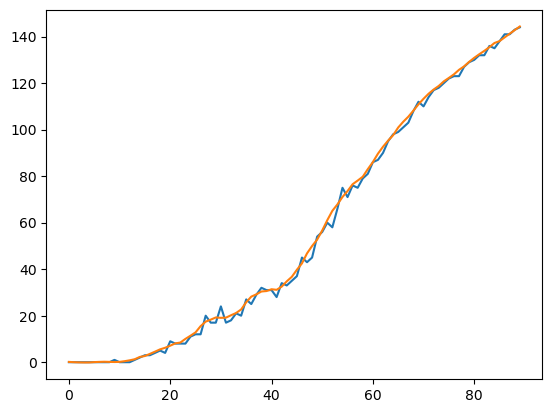

In [168]:
i = 8
plt.plot(FF[i])
plt.plot(FFcl[i]);

vi = 0.68Hz


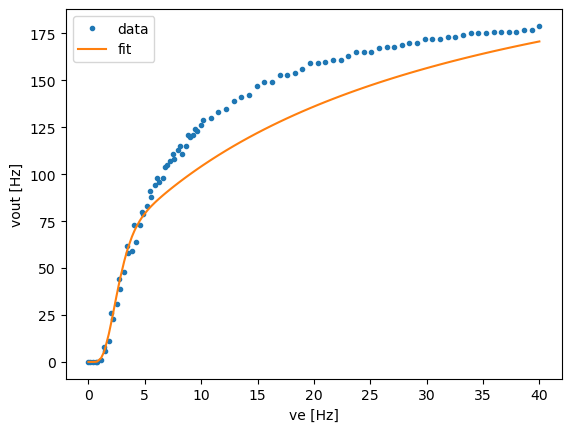

In [152]:
# compare fit

# choose vi...
i =1

print(f'vi = {vi[i]:.2f}Hz')

plt.plot(ve,FF[i], 'o', ms=3, label='data')
plt.plot(ve,TF(PP, muV, sV, Tv, TvN)[i], label='fit')

plt.xlabel('ve [Hz]')
plt.ylabel('vout [Hz]')
plt.legend();
# plt.xlim(0,10)


In [151]:
#===== SAVE fitted parameters ======

np.save(f'./data/FITparams_{typ}_try_1.npy', PP)

In [176]:
# compare fit

# choose vi...
i =20

print(f'vi = {vi[i]:.2f}Hz')

plt.plot(FF[i], 'o', ms=3, label='data')
plt.plot(TF(PP, muV, sV, Tv, TvN)[i], label='fit')

plt.xlabel('ve [Hz]')
plt.ylabel('vout [Hz]')
plt.legend();


vi = 13.56Hz


In [178]:
TF(PP, muV, sV, Tv, TvN)[i]

5.197357260756424

In [414]:
ve = np.linspace(0, 40, 60)
vi = np.linspace(0, 40, 60)

vve, vvi = np.meshgrid(ve, vi)
typ = 'RS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

vi = 6.78Hz
vi = 6.78Hz


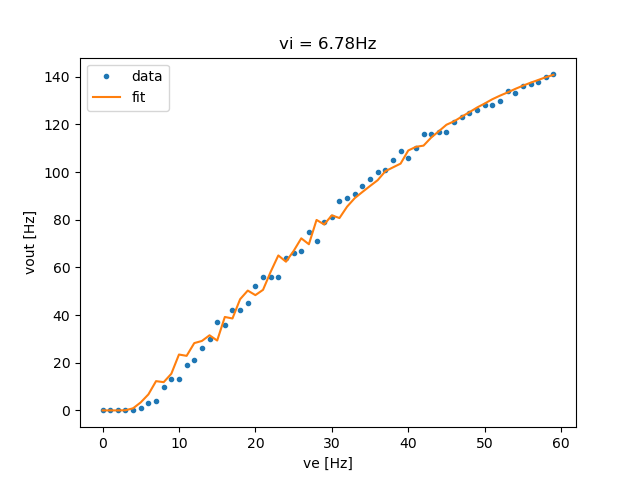

In [104]:
# compare fit

# choose vi...
i =10

print(f'vi = {vi[i]:.2f}Hz')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(f'vi = {vi[i]:.2f}Hz')
print(f'vi = {vi[i]:.2f}Hz')

ax.plot(FF[i], 'o', ms=3, label='data')
ax.plot(TF(PRS1, muV, sV, Tv, TvN)[i], label='fit')

ax.set_xlabel('ve [Hz]')
ax.set_ylabel('vout [Hz]')
plt.legend();

In [105]:
PRS1

array([-0.05047322,  0.00046013,  0.00974148, -0.01579837,  0.00256601,
        0.00073166,  0.01485085,  0.0036661 ,  0.02082792,  0.03583452])

In [106]:
PFS1

array([-0.0421241 , -0.01014122,  0.0590872 ,  0.04315455,  0.00202911,
        0.00475019, -0.03575573,  0.01906278,  0.13643658,  0.13677361])

In [417]:
params['RS']

{'P': array([-0.05017034,  0.00451531, -0.00794377, -0.00208418, -0.00054697,
         0.00194753,  0.00274079,  0.00341614, -0.01066769, -0.01156433]),
 'Nexc': 400,
 'Ninh': 100,
 'Qe': 1.5e-09,
 'Qi': 5e-09,
 'Cm': 2e-10,
 'El': -0.064,
 'Gl': 1e-08,
 'Tw': 0.5,
 'a': 0.0,
 'b': 3e-11,
 'Ti': 0.005,
 'Te': 0.005,
 'Ee': 0,
 'Ei': -0.08}

In [418]:
params['FS']

{'P': array([-0.05184978,  0.0061593 , -0.01403522,  0.00166511, -0.0020559 ,
         0.00656668,  0.00171829,  0.00318432, -0.04516385, -0.03112775]),
 'Nexc': 400,
 'Ninh': 100,
 'Qe': 1.5e-09,
 'Qi': 5e-09,
 'Cm': 2e-10,
 'El': -0.065,
 'Gl': 1e-08,
 'Tw': 0.5,
 'a': 0,
 'b': 0.0,
 'Ti': 0.005,
 'Te': 0.005,
 'Ee': 0,
 'Ei': -0.08}

In [102]:
path = "/DATA/Maria/MF-TransferFunction-main/data/"
PFS1name = "FITparams_FS_exp_npts_60_no_range_nue_10.npy"
PRS1name = "FITparams_RS_exp_npts_60_no_range_nue_10.npy"

PFS1name = "FITparams_FS_exp_npts_60_no_range_correct_params.npy"
PRS1name = "FITparams_RS_exp_npts_60_no_range_correct_params.npy"



PRS1 = np.load(path + PRS1name)
PFS1 = np.load(path+PFS1name)

In [95]:
ve = np.linspace(0, 40, 60)
vi = np.linspace(0, 40, 60)

vve, vvi = np.meshgrid(ve, vi)
typ = 'RS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

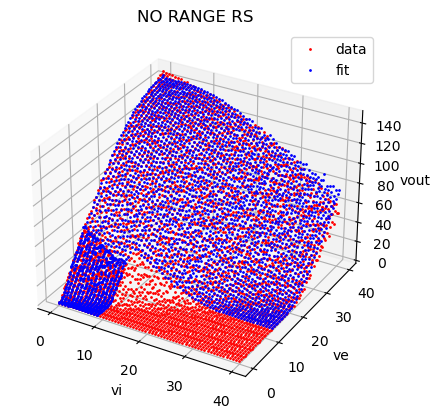

In [181]:
# Create a new figure
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1, label='FS')
ax.plot3D(vvi.flatten(), vve.flatten(), FF.flatten(), 'or', markersize=1, label='data')
ax.plot3D(vvi.flatten(), vve.flatten(), TF(PP, muV, sV, Tv, TvN).flatten(), 'ob', markersize=1, label='fit')

# Set labels for the axes
ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')

ax.set_title("NO RANGE RS")

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [53]:
ve = np.linspace(0, 40, 60)
vi = np.linspace(0, 40, 60)

vve, vvi = np.meshgrid(ve, vi)
typ = 'FS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

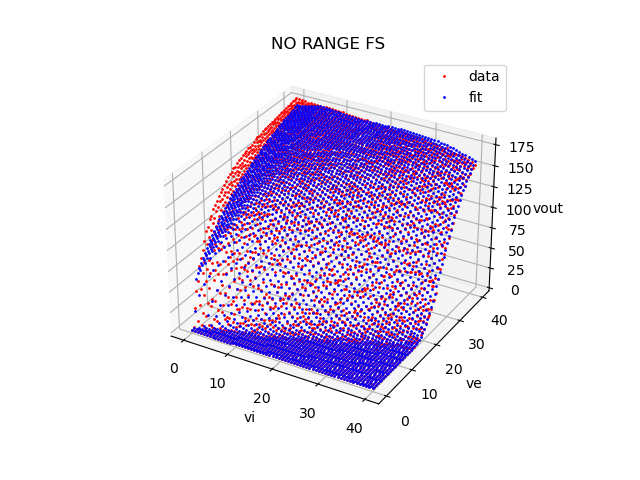

In [55]:
# Create a new figure
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1, label='FS')
ax.plot3D(vvi.flatten(), vve.flatten(), FF.flatten(), 'or', markersize=1, label='data')
ax.plot3D(vvi.flatten(), vve.flatten(), TF(PP, muV, sV, Tv, TvN).flatten(), 'ob', markersize=1, label='fit')

# Set labels for the axes
ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')

ax.set_title("NO RANGE FS")

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [72]:
ve = np.linspace(0, 40, 60)
vi = np.linspace(0, 40, 60)

vve, vvi = np.meshgrid(ve, vi)
typ = 'RS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

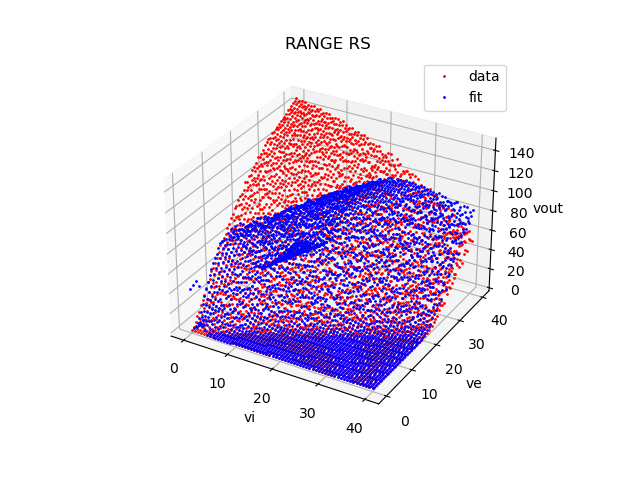

In [75]:
# Create a new figure
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1, label='FS')
ax.plot3D(vvi.flatten(), vve.flatten(), FF.flatten(), 'or', markersize=1, label='data')
ax.plot3D(vvi.flatten(), vve.flatten(), TF(PP, muV, sV, Tv, TvN).flatten(), 'ob', markersize=1, label='fit')

# Set labels for the axes
ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')

ax.set_title("RANGE RS")

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [88]:
ve = np.linspace(0, 40, 60)
vi = np.linspace(0, 40, 60)

vve, vvi = np.meshgrid(ve, vi)
typ = 'FS'

exec(f'FF={typ}')
muV, sV, Tv, TvN = MPF(typ, vve, vvi, FF)

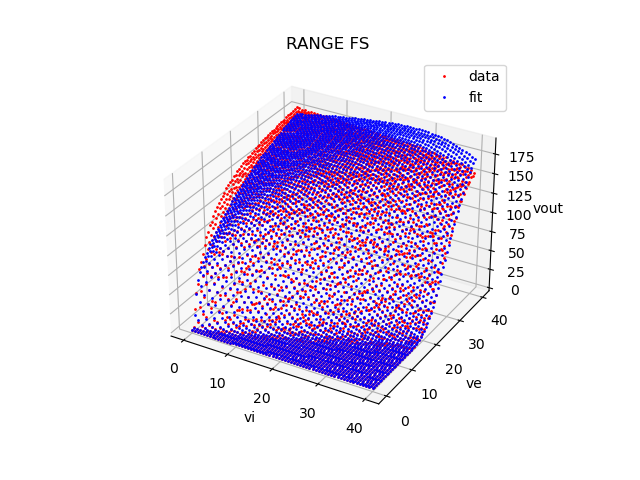

In [89]:
# Create a new figure
fig = plt.figure()

# Create axes for the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Plot the data
# ax.plot3D(vvi.flatten(), vve.flatten(), FS.flatten(), 'ob', markersize=1, label='FS')
ax.plot3D(vvi.flatten(), vve.flatten(), FF.flatten(), 'or', markersize=1, label='data')
ax.plot3D(vvi.flatten(), vve.flatten(), TF(PP, muV, sV, Tv, TvN).flatten(), 'ob', markersize=1, label='fit')

# Set labels for the axes
ax.set_xlabel('vi')
ax.set_ylabel('ve')
ax.set_zlabel('vout')

ax.set_title("RANGE FS")

# Add a legend
ax.legend()

# Display the plot
plt.show()

vi = 0.00Hz
vi = 8.95Hz
vi = 17.89Hz
vi = 26.84Hz
vi = 35.79Hz
vi = 44.74Hz
vi = 53.68Hz
vi = 62.63Hz
vi = 71.58Hz
vi = 80.53Hz
vi = 89.47Hz
vi = 98.42Hz
vi = 107.37Hz
vi = 116.32Hz
vi = 125.26Hz
vi = 134.21Hz
vi = 143.16Hz
vi = 152.11Hz
vi = 161.05Hz


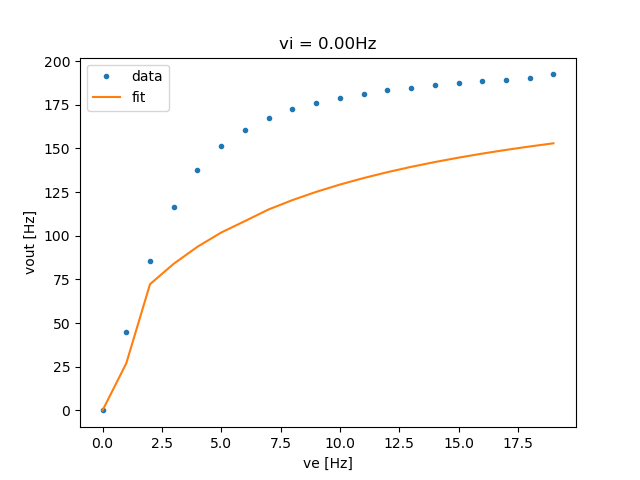

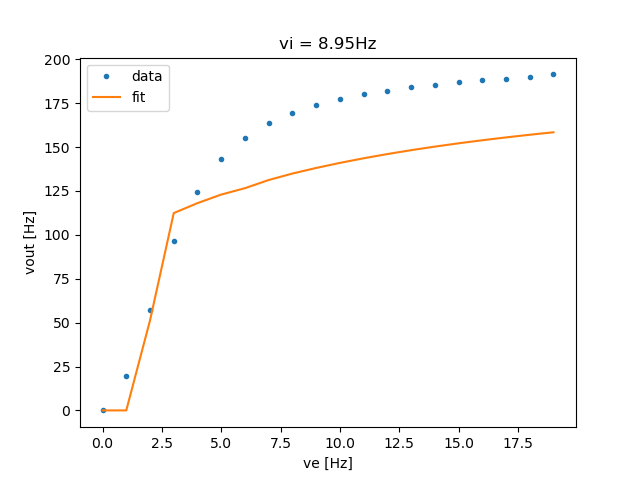

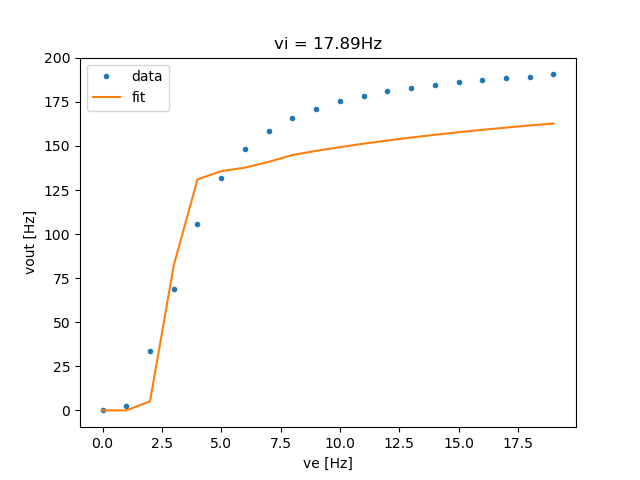

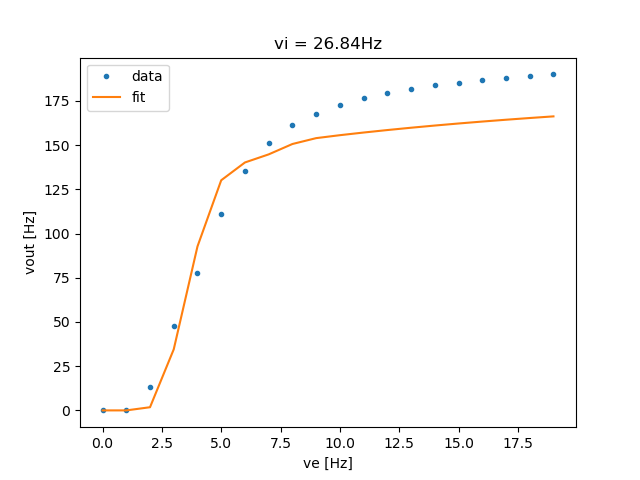

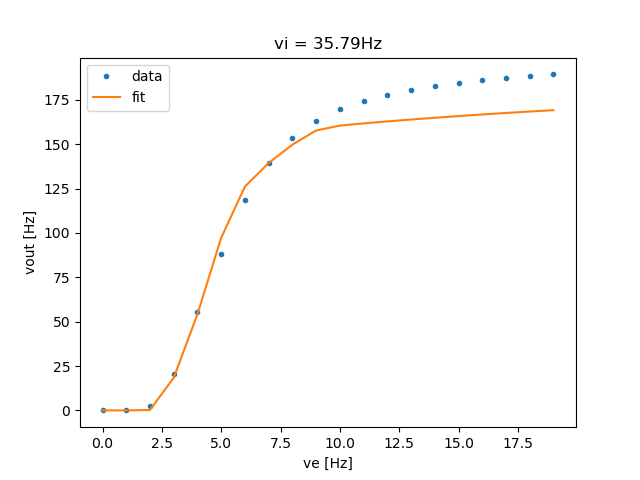

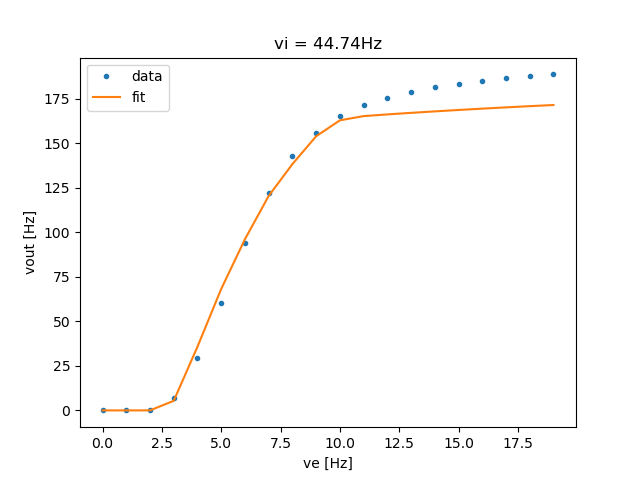

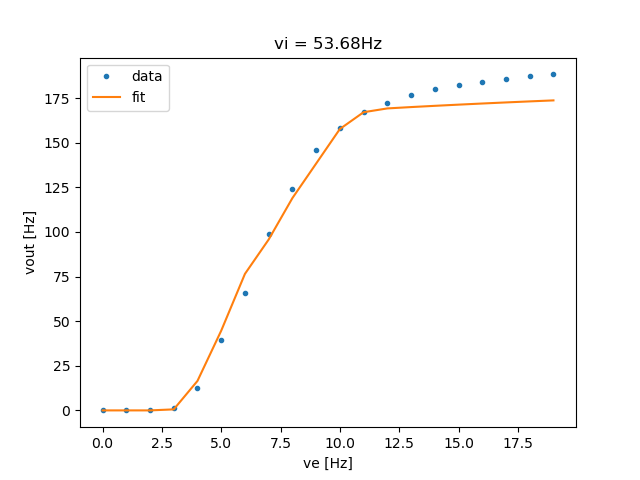

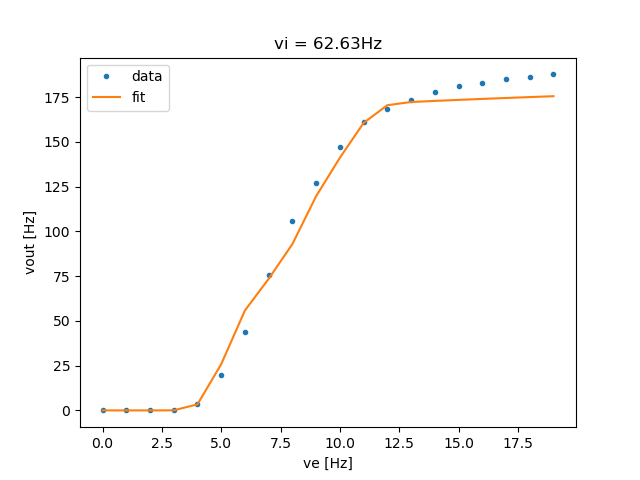

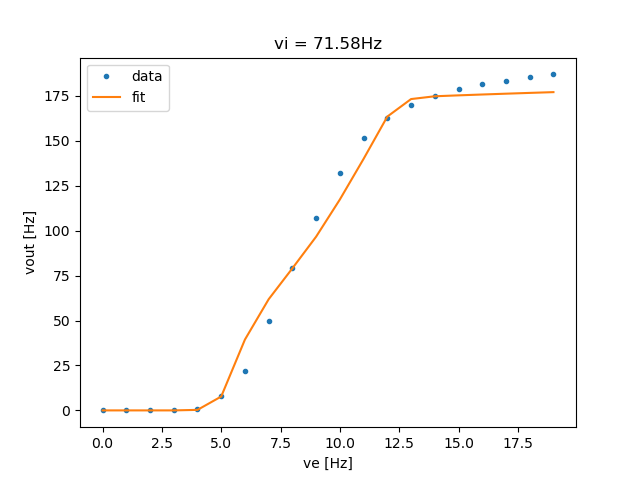

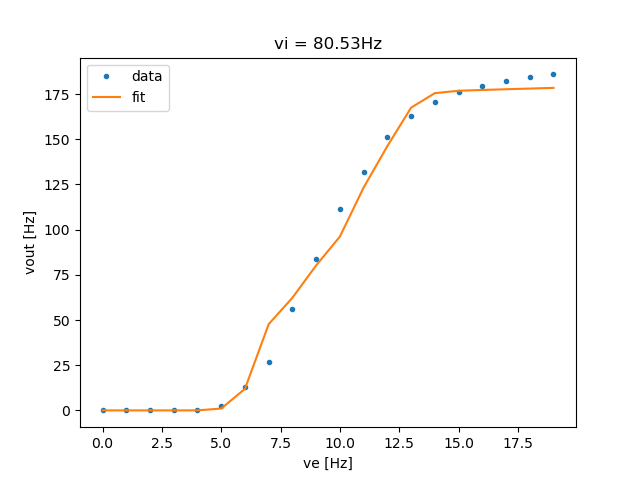

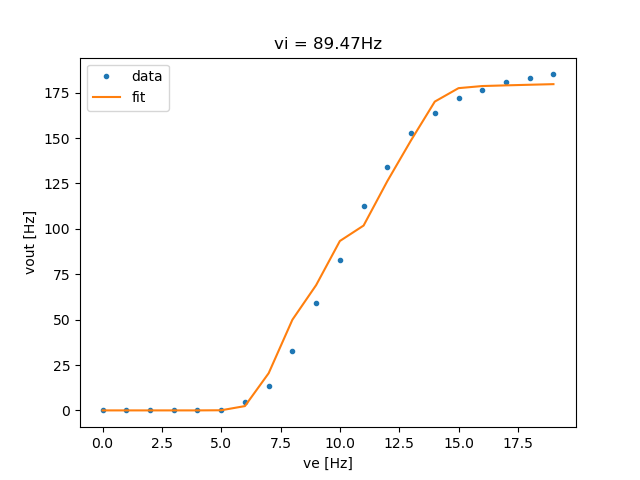

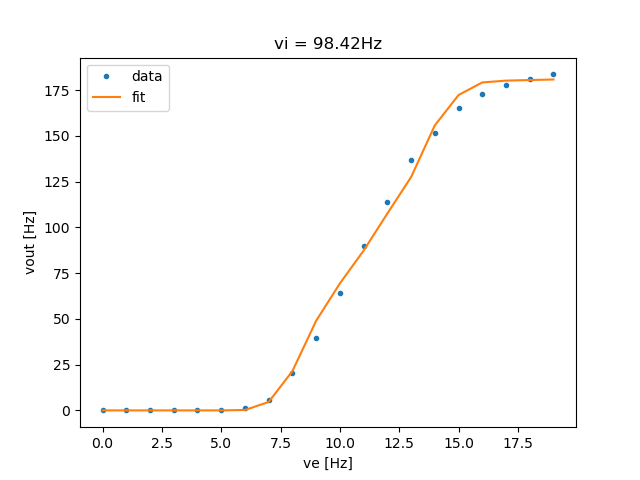

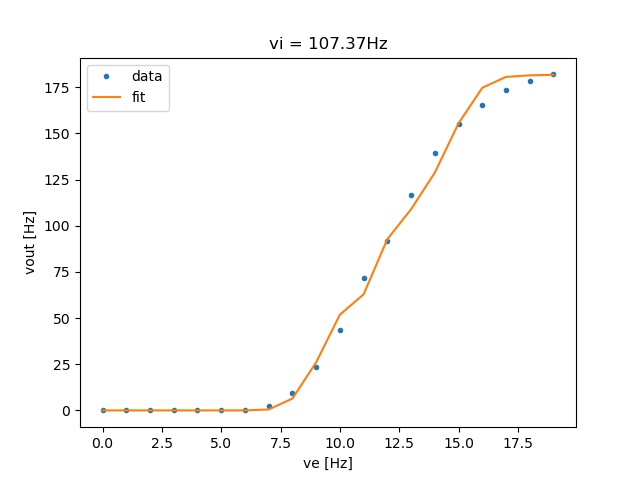

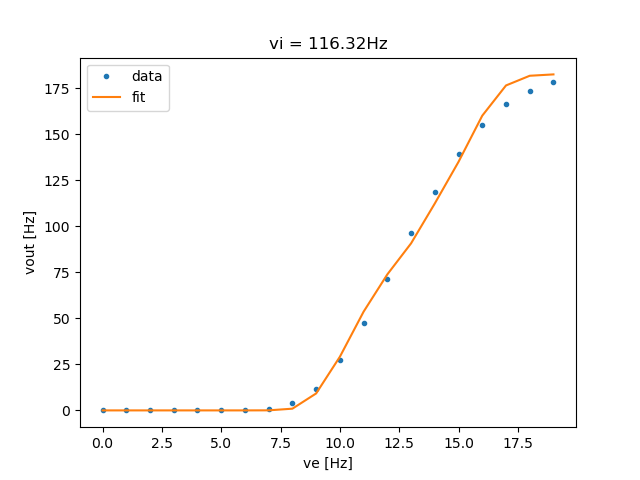

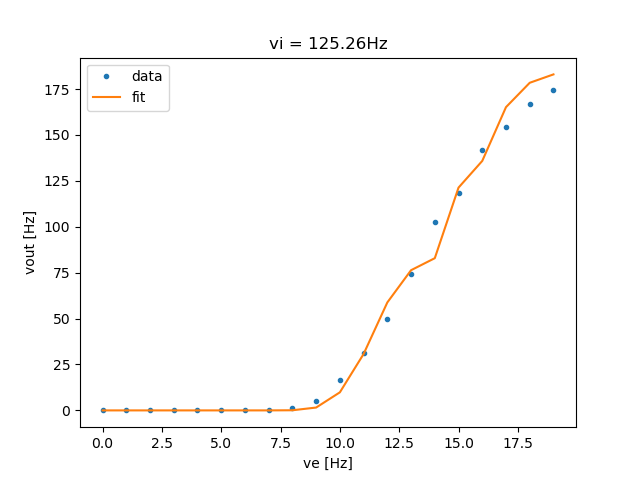

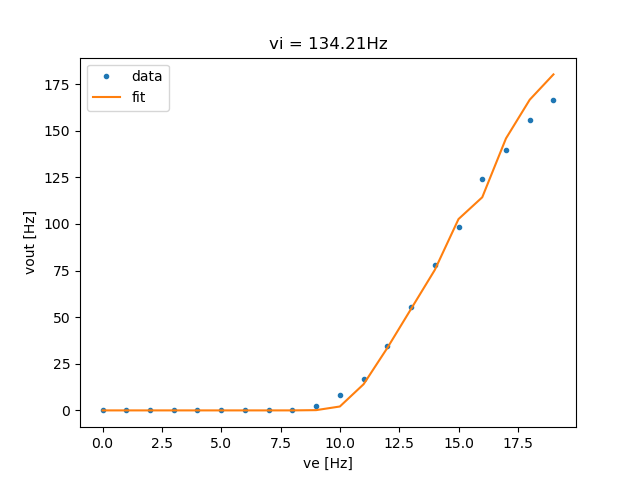

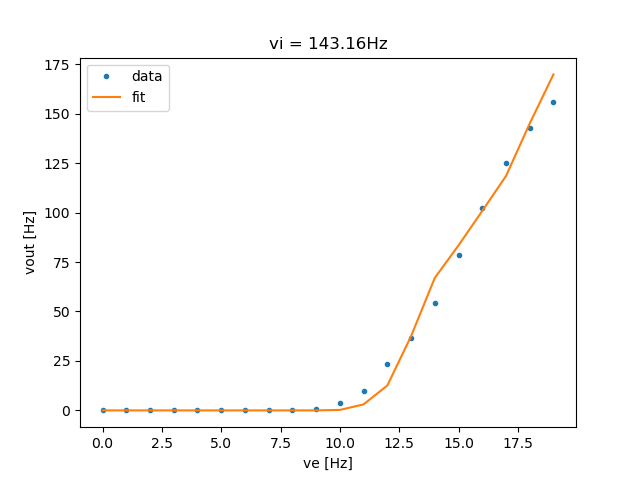

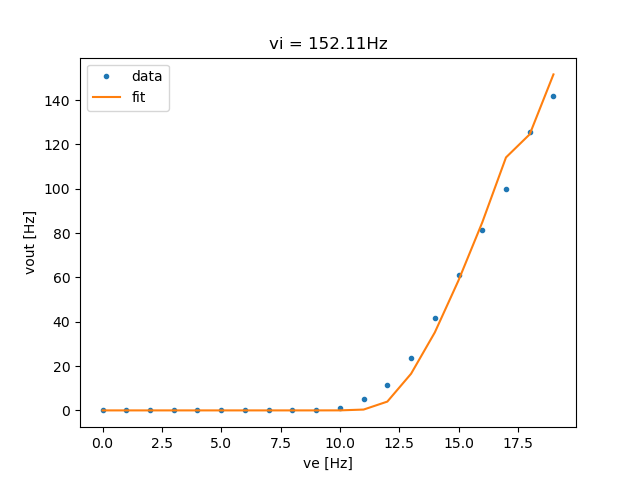

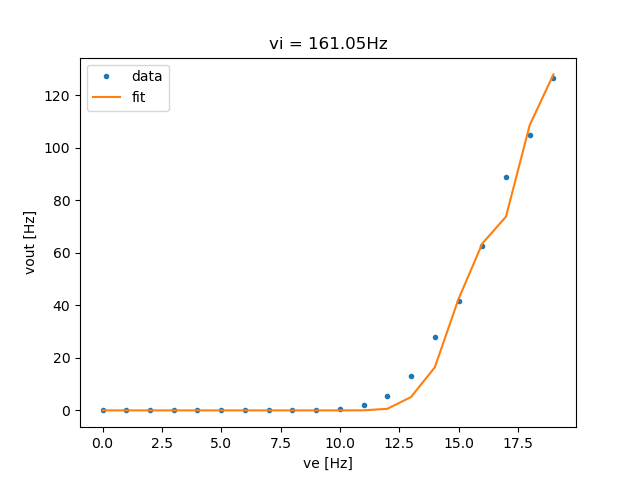

In [215]:
# compare fit

# choose vi...
#     i =0
for i in range(19):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(f'vi = {vi[i]:.2f}Hz')
    print(f'vi = {vi[i]:.2f}Hz')

    ax.plot(FF[i], 'o', ms=3, label='data')
    ax.plot(TF(PP, muV, sV, Tv, TvN)[i], label='fit')

    ax.set_xlabel('ve [Hz]')
    ax.set_ylabel('vout [Hz]')
    plt.legend();


In [270]:
PP

array([-0.04681599,  0.00153446, -0.00483709, -0.00482186,  0.0017782 ,
        0.00295855,  0.00169055,  0.00897812, -0.01333462, -0.01158798])

In [79]:
#===== SAVE fitted parameters ======

np.save(f'data\\FITparams_{typ}_exp.npy', PP)

In [397]:
typ

'FS'

In [85]:
#===== SAVE fitted parameters ======

np.save(f'./data/FITparams_{typ}_try_1.npy', PP)

___
___
#### END (other ideas stuff beyond here + unimaginable horrors beyond your imagination)
___
___

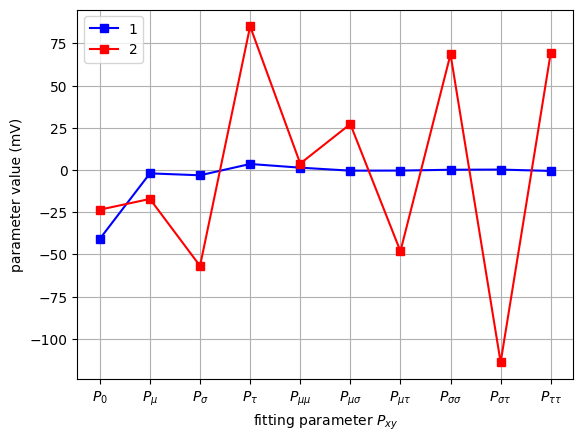

In [25]:
# pZ=np.load("C:\VSCode\DB_comparison\mf\data\FS-cell_CONFIG1_fit.npy")[[0,1,2,3,5,8,9,6,10,7]]
pppp2=np.load('data\\NEW6params_RE.npy')*1e3
pppp3=np.load('data\\NEW5params_RE.npy')*1e3
# pppp2=np.load('data\\NEW4params_RE.npy')
# pppp3=np.load('data\\NEW6params_RE.npy')
plt.plot(pppp2,'s-b',label='1')
plt.plot(pppp3,'s-r',label='2')
labels = ['$P_0$','$P_{\mu}$','$P_{\sigma}$','$P_{\\tau}$' , '$P_{\mu\mu}$','$P_{\mu\sigma}$','$P_{\mu\\tau}$','$P_{\sigma\sigma}$','$P_{\sigma\\tau}$','$P_{\\tau\\tau}$']
plt.xticks(range(len(labels)),labels);
plt.ylabel('parameter value (mV)')
plt.xlabel('fitting parameter $P_{xy}$')
plt.grid()
plt.legend()
# plt.savefig('gfx\\fitparams.png',dpi=200,bbox_inches='tight')

___

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from mytools import ornstein_uhlenbeck

In [3]:
typ='TC'
PP = np.load(f'data\\NEW6params_{typ}.npy')

In [4]:
def TF2(P,fexc,finh,adapt, Nexc,Ninh,Qe,Qi,Cm,El, noise=1):

    fe = fexc*Nexc
    fi = finh*Ninh

    fe+=1e-9;
    fi+=1e-9;
    
    muGi = Qi*Ti*fi;
    muGe = Qe*Te*fe;
    muG = Gl+muGe+muGi;
    muV = (muGe*Ee+muGi*Ei+Gl*El-adapt)/muG;
    # muV = (muGe*Ee+muGi*Ei+Gl*El - fout*Tw*b + a*El)/(muG+a);
    
    
    muGn = muG/Gl;
    Tm = Cm/muG;
    
    Ue =  Qe/muG*(Ee-muV);
    Ui = Qi/muG*(Ei-muV);
    
    sV = np.sqrt(fe*(Ue*Te)*(Ue*Te)/2./(Te+Tm)+fi*(Ui*Ti)*(Ui*Ti)/2./(Ti+Tm));

    sV*=noise
    
    
    fe+=1e-9;
    fi+=1e-9;

    Tv = ( fe*(Ue*Te)*(Ue*Te) + fi*(Qi*Ui)*(Qi*Ui)) /( fe*(Ue*Te)*(Ue*Te)/(Te+Tm) + fi*(Qi*Ui)*(Qi*Ui)/(Ti+Tm) );
    TvN = Tv*Gl/Cm;
    
    muV0=-60e-3;
    DmuV0 = 10e-3;
    sV0 =4e-3;
    DsV0= 6e-3;
    TvN0=0.5;
    DTvN0 = 1.;

    vthre = P[0] + P[1]*(muV-muV0)/DmuV0 + P[2]*(sV-sV0)/DsV0 + P[3]*(TvN-TvN0)/DTvN0 \
    + P[4]*((muV-muV0)/DmuV0)*((muV-muV0)/DmuV0) + P[5]*(muV-muV0)/DmuV0*(sV-sV0)/DsV0 + P[6]*(muV-muV0)/DmuV0*(TvN-TvN0)/DTvN0 + P[7]*((sV-sV0)/DsV0)*((sV-sV0)/DsV0) + P[8]*(sV-sV0)/DsV0*(TvN-TvN0)/DTvN0 + P[9]*((TvN-TvN0)/DTvN0)*((TvN-TvN0)/DTvN0);


    frout = 1/(2*Tv) * erfc( (vthre - muV)/(np.sqrt(2)*sV) )
    
    return frout;

Gl=10*1.e-9
Tw=200*1.e-3
b=0.01*1e-9

Ti=5*1.e-3
Te=5*1.e-3
Ee=0
Ei=-80*1.e-3

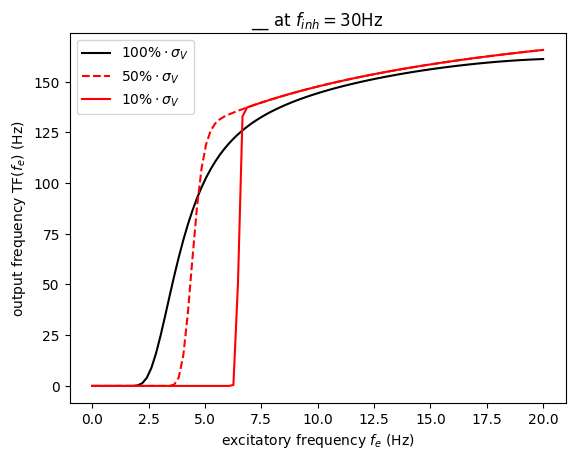

In [25]:
fe = np.linspace(0,20,100)
fi = 30
if typ=='TC':
    fout1 = TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3)
    fout2 = TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-55e-3, noise=.3)
    fout3 = TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-55e-3, noise=.1)
# PP2=PP.copy()
# PP2[2] = RE[2]
# PP2[5]*=2
# PP2[8] = RE[8]
# PP2[9] = RE[9]
if typ=='RE':
    fout1 = TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3)
    fout2 = TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3, noise=0.5)
    fout3 = TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3, noise=0.1)

plt.plot(fe,fout1,'black', label='$100\%\cdot\sigma_V$')
plt.plot(fe,fout2,'--r', label='$50\%\cdot\sigma_V$')
plt.plot(fe,fout3,'r', label='$10\%\cdot\sigma_V$')

plt.legend()
plt.xlabel("excitatory frequency $f_e$ (Hz)")
plt.ylabel("output frequency TF$(f_e)$ (Hz)")
plt.title("__ at $f_{inh}=30$Hz");
# plt.savefig("NoiseTF_TC_new.png", dpi=250)

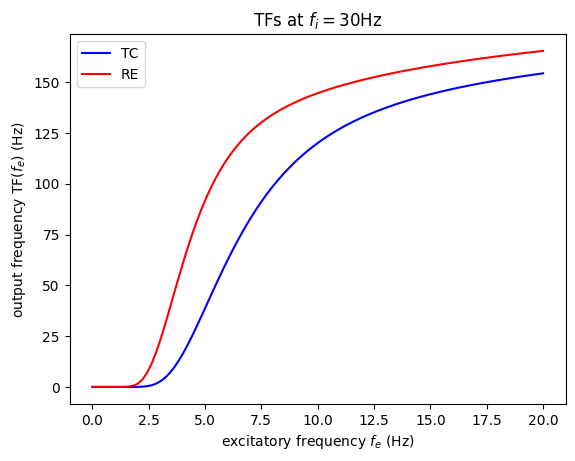

In [19]:
fe = np.linspace(0,20,100)
fi = 30
fout1 = TF2(np.load('data\\NEW6params_TC.npy'),fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3)
fout2 = TF2(np.load('data\\NEW6params_RE.npy'),fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3)

plt.plot(fe,fout1,'b', label='TC')
plt.plot(fe,fout2,'r', label='RE')

plt.legend()
plt.xlabel("excitatory frequency $f_e$ (Hz)")
plt.ylabel("output frequency TF$(f_e)$ (Hz)")
plt.title(f"TFs at $f_i=30$Hz");
# plt.savefig("TF.png", dpi=250)

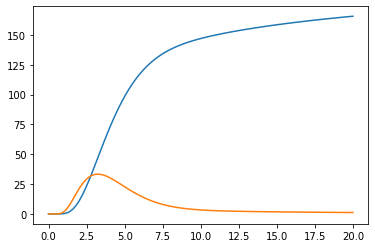

In [8]:
fe = np.linspace(0,20,100)
fi = 30
# plt.plot(fi,TF2(PP,fe,fi,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3))
plt.plot(fe,TF2(PP,fe,fi,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3))

def der(fe,fi,dfe=1e-5,dfi=0):
    # return (TF2(PP,fe+dfe/2,fi+dfi/2,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3) - TF2(PP,fe-dfe/2,fi-dfi/2,0, Nexc=800,Ninh=25,Qe=1e-9,Qi=6e-9,Cm=160e-12,El=-65e-3))/(dfe+dfi)
    return (TF2(PP,fe+dfe/2,fi+dfi/2,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3) - TF2(PP,fe-dfe/2,fi-dfi/2,0, Nexc=400,Ninh=150,Qe=4e-9,Qi=1e-9,Cm=200e-12,El=-75e-3))/(dfe+dfi)
plt.plot(fe,der(fe,fi))